In [61]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams["font.size"] = 12

# Stratologger

In [0]:
import numpy as np

data_path = "/content/drive/My Drive/2019 Aerospace IREC Capstone Design Project /Launch Data/2019 IREC Flight Data /119_stratologger_1.pf2"

raw_data = np.loadtxt(data_path, delimiter=',', skiprows=18)

time = raw_data[:,0]
altitude = raw_data[:,1]

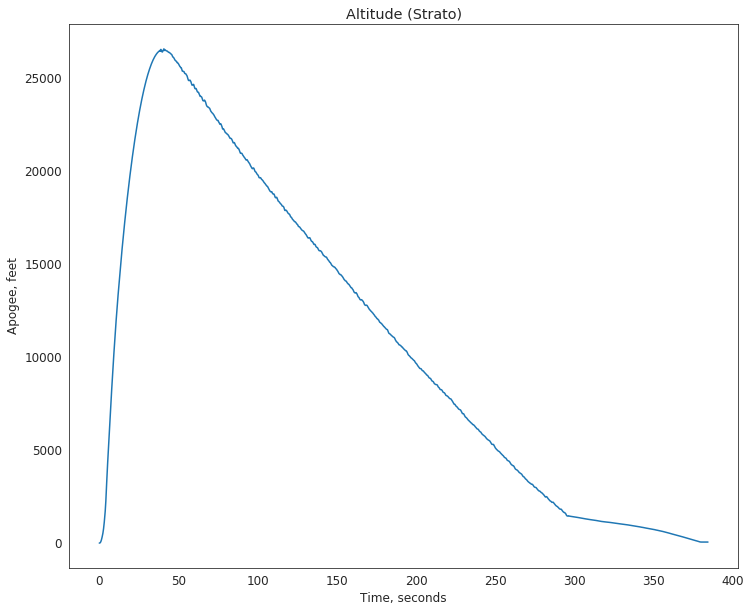

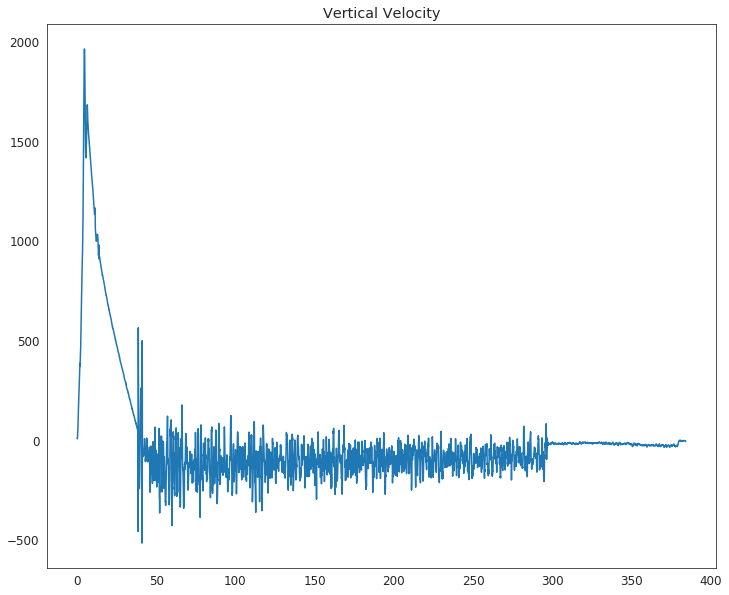

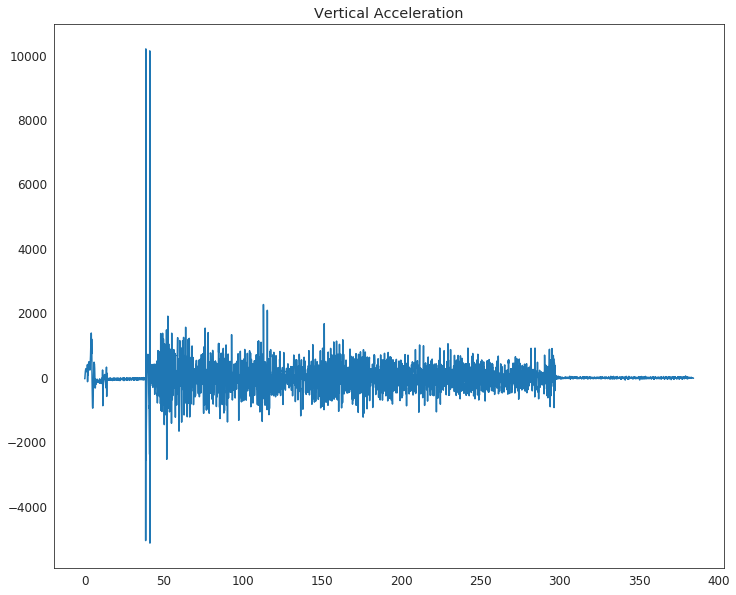


Ascent time: 40.8


In [72]:
from scipy.signal import savgol_filter, medfilt
from scipy.ndimage import gaussian_filter1d

sns.set_style("white")

dx = time[1] - time[0]

altitude_filtered = savgol_filter(altitude, 51, 5)
altitude_filtered2 = medfilt(altitude, kernel_size=51)
# altitude_filtered = gaussian_filter1d(altitude, 5)

plt.plot(time, altitude_filtered)
# plt.plot(time, altitude)
# plt.plot(time, altitude_filtered - altitude)
plt.title("Altitude (Strato)")
plt.ylabel("Apogee, feet")
plt.xlabel("Time, seconds")
plt.show()
print()

vel = np.gradient(altitude_filtered, dx)
plt.plot(time, vel)
plt.title("Vertical Velocity")
plt.show()
print()

accel = np.gradient(vel, dx)
plt.plot(time, accel)
plt.title("Vertical Acceleration")
plt.show()
print()

# max_vel_index = np.argmax(vel)
# print("Burn time: {}".format(time[max_vel_index]))

ascent_time_index = np.argmax(altitude_filtered)
print("Ascent time: {}".format(time[ascent_time_index]))

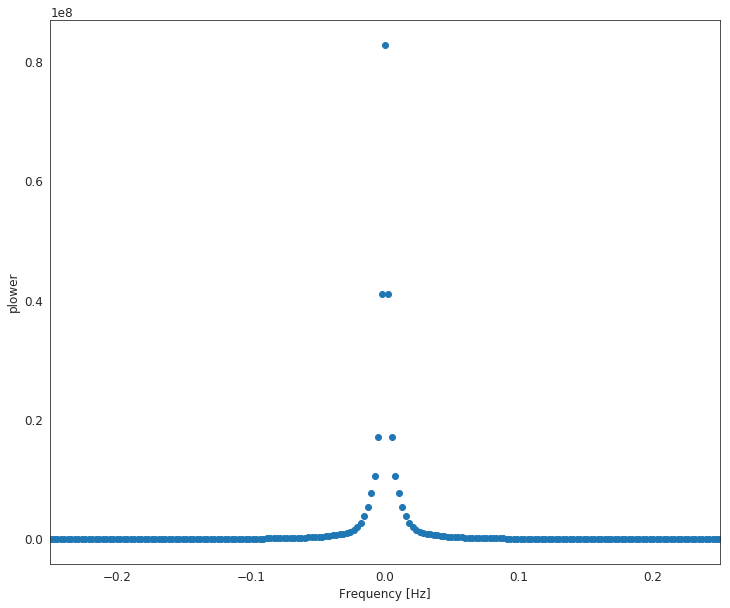

In [65]:
from scipy import fftpack

sig_fft = fftpack.fft(altitude)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(altitude.size, d=dx)

plt.scatter(sample_freq, power)
plt.xlim(-0.25, 0.25)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
plt.show()

# Payload

In [0]:
import numpy as np

def pressure2altitude(pressure, p_b=101325, T_b=288.15, L_b=-0.0065, h=0,
                      h_b=11000, R=8.3144598, g=9.80665, M=0.0289644):
    
    # base = T_b / (T_b + L_b * (h - h_b))
    exp = (g * M) / (R * L_b)
    
    # return p_b * np.power(base, exp)
    
    return 1/(0.0065) * (np.power(p_b/pressure, 1/5.257) - 1) * (T_b)

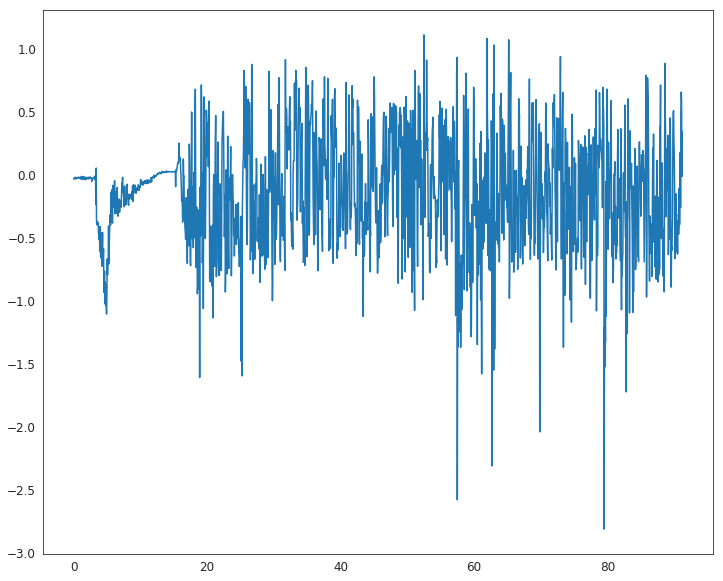

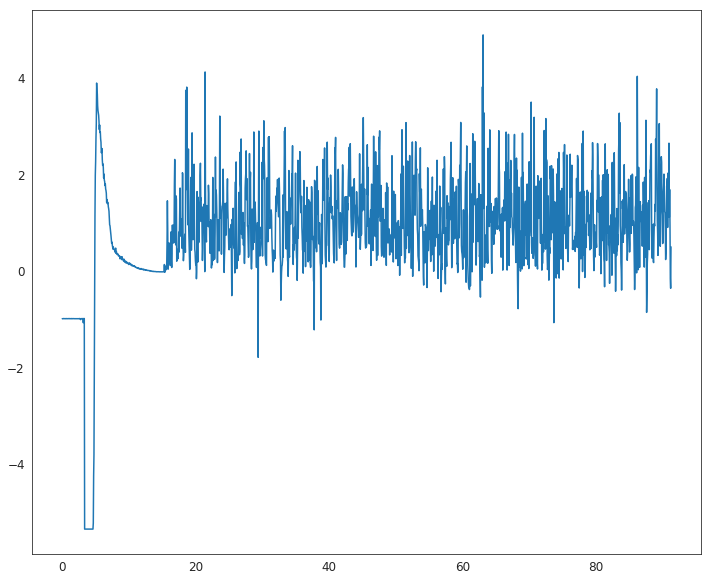

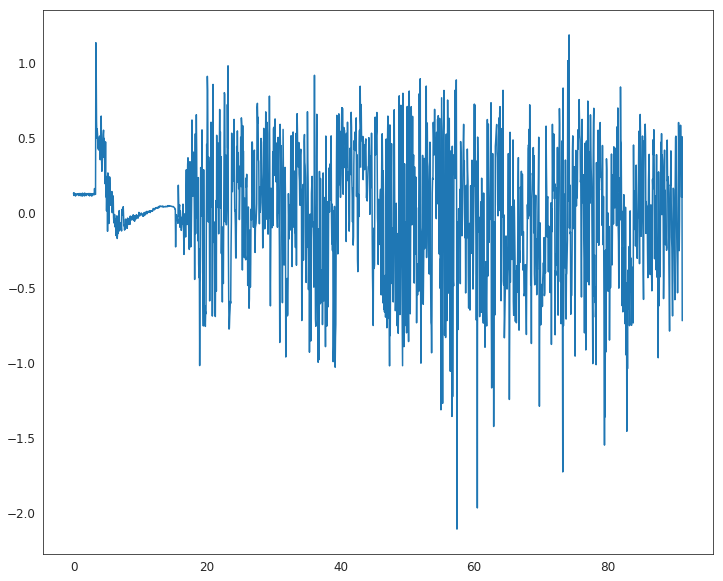

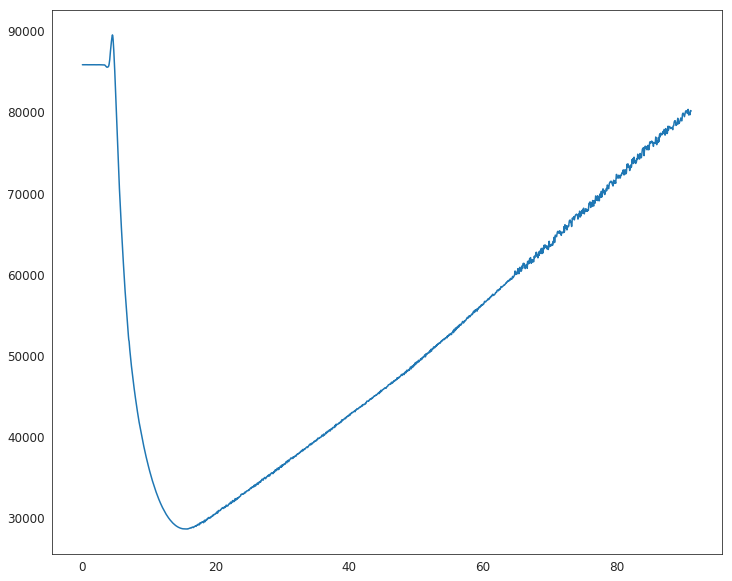

In [67]:
data_path_payload = "/content/drive/My Drive/2019 Aerospace IREC Capstone Design Project /Launch Data/2019 IREC Flight Data /payload/2_edited.csv"

raw_data = np.loadtxt(data_path_payload, delimiter=',', skiprows=1)

# time = raw_data[:,0]
accel_xg = raw_data[:,1]
accel_yg = raw_data[:,2]
accel_zg = raw_data[:,3]
pressure = raw_data[:,15]

timestep = 0.05
n_points = len(accel_xg)
time_p = np.arange(0, n_points*timestep, timestep)

arr = [accel_xg, accel_yg, accel_zg, pressure]

for a in arr:
    plt.plot(time_p, a)
    plt.show()

# Open Rocket

In [0]:
data_path_or = "/content/drive/My Drive/2019 Aerospace IREC Capstone Design Project /Launch Data/2019 IREC Flight Data /openrocket_irec.csv"

raw_data_or = np.loadtxt(data_path_or, delimiter=',', skiprows=7, encoding='unicode_escape')

time_or = raw_data_or[:,0]
altitude_or = raw_data_or[:,1]

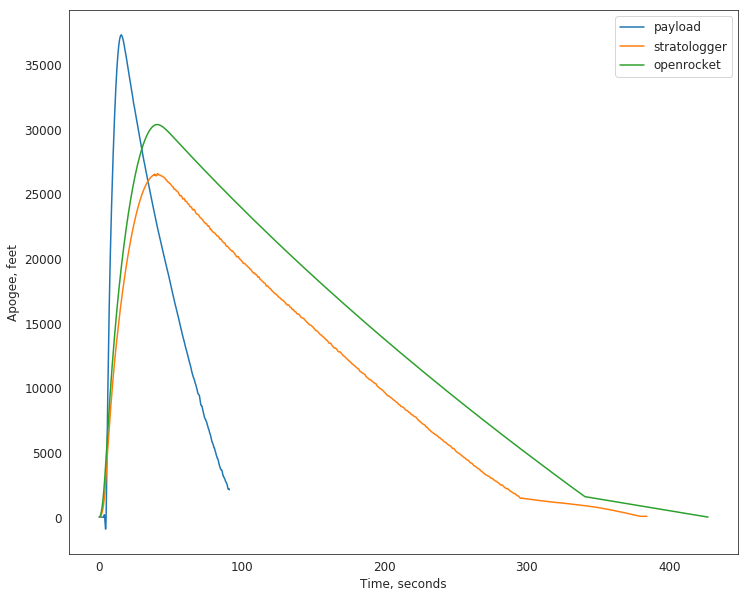

Apogee: 42288 feet
Apogee: 26549 feet


In [69]:
pressure_f = savgol_filter(pressure, 51, 5)
altitude_p = pressure2altitude(pressure_f, T_b=35+273.15)

ascent_time = 40
ascent_index = int(ascent_time/dx)

plt.plot(time_p, (altitude_p - altitude_p[0]) * 3.281, label="payload")
plt.plot(time, altitude_filtered, label="stratologger")
plt.plot(time_or, altitude_or * 3.281, label="openrocket")
plt.legend()
plt.ylabel("Apogee, feet")
plt.xlabel("Time, seconds")
plt.show()

print("Apogee: {:.0f} feet".format(np.max(altitude_p) * 3.281))
print("Apogee: {:.0f} feet".format(np.max(altitude_filtered)))

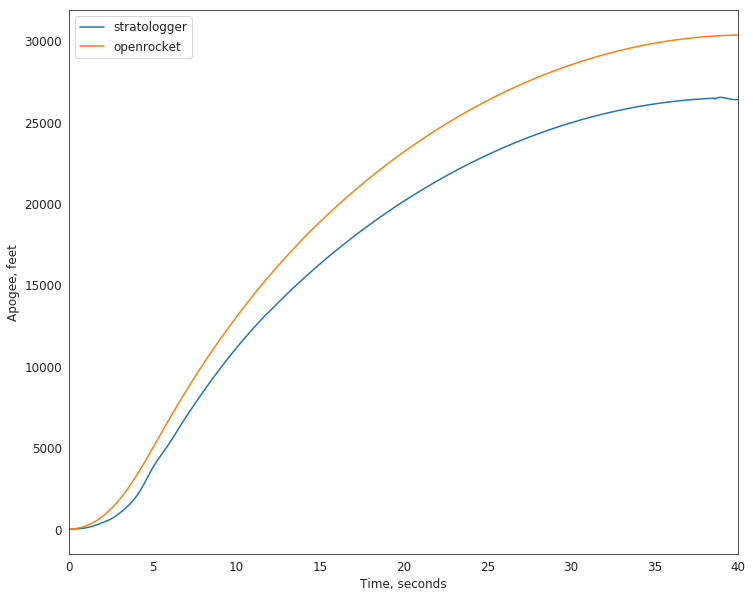

In [70]:
plt.plot(time, altitude_filtered, label="stratologger")
plt.plot(time_or, altitude_or * 3.281, label="openrocket")
plt.legend()
plt.xlim(0, ascent_time)
plt.ylabel("Apogee, feet")
plt.xlabel("Time, seconds")
plt.show()

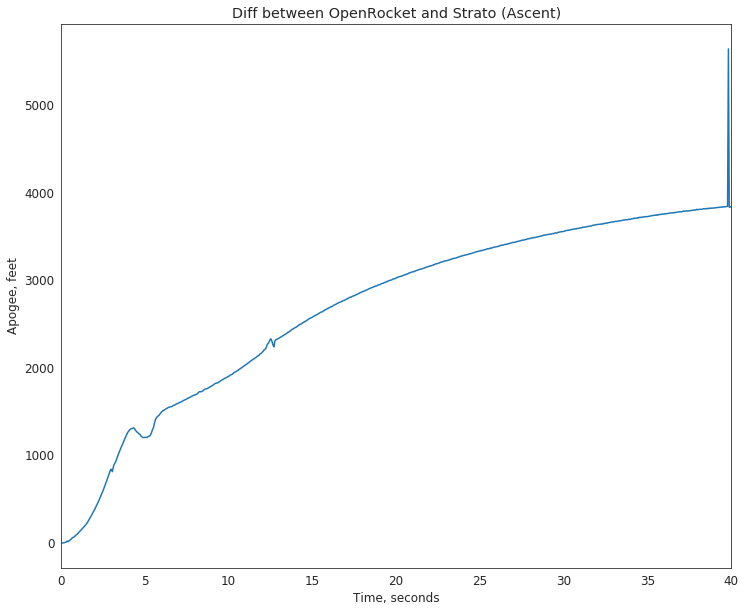

In [71]:
altitude_or_int = np.interp(time, time_or, altitude_or* 3.281)

diff = altitude_or_int - altitude

plt.plot(time, diff)
plt.xlim(0, ascent_time)
plt.title("Diff between OpenRocket and Strato (Ascent)")
plt.ylabel("Apogee, feet")
plt.xlabel("Time, seconds")
plt.show()